In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline

In [2]:
#Read in the csv dataset (fuel_data)
fuel_data = pd.read_csv("fuel_ferc1.csv")
fuel_data.describe(include='all')
fuel_data.head(5)

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533,1.000,2.77,2.77,2.570


## Question 1

In [10]:

#defined list A and B
A = [1,2,3,4,5,6]
B = [13,21,34]

#using extend() to add B at the end of A
A.extend(B)
A_B = A
print(A_B)

[1, 2, 3, 4, 5, 6, 13, 21, 34]


## Question 2

In [89]:
#print identity matrix
np.identity(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

## Question 3

In [14]:
#group by fuel type and print out mean of fuel cost per unit burned for each fuel type, put into variable 'mean'
mean = fuel_data.groupby('fuel_type_code_pudl')['fuel_cost_per_unit_burned'].mean()
mean


fuel_type_code_pudl
coal         67.421830
gas          13.659397
nuclear    4955.157002
oil         168.877086
other        18.253856
waste        19.518122
Name: fuel_cost_per_unit_burned, dtype: float64

In [31]:
Smallest = min(mean)
Smallest
mean.nsmallest(n=1)

fuel_type_code_pudl
gas    13.659397
Name: fuel_cost_per_unit_burned, dtype: float64

## Question 4

In [32]:
#get the descriptive statistics of 'fuel_mmbtu_per_unit' and round up to 2 deciaml place
fuel_data['fuel_mmbtu_per_unit'].describe().round(2)

count    29523.00
mean         8.49
std         10.60
min          0.00
25%          1.02
50%          5.76
75%         17.01
max        341.26
Name: fuel_mmbtu_per_unit, dtype: float64

## Question 5

In [45]:
fuel_data['fuel_qty_burned'].skew().round(2)

15.85

In [44]:
fuel_data['fuel_qty_burned'].kurt().round(2)

651.37

## Question 6

In [46]:
#checking for missing values
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

In [48]:

#Feature of missing values
Feature = fuel_data.columns[fuel_data.isnull().any()]

#total
total = fuel_data.isnull().values.sum()


In [ ]:
print(Feature)
print(total)

In [57]:
count= fuel_data.count()
fuel_data.shape

(29523, 11)

In [65]:
fuel_data.describe( include='all')

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_1997_12_99_0_6,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [73]:
#Percent
Percent = ((total/29343)*100).round(3)
print(Feature)
print(total)
print(Percent)

Index(['fuel_unit'], dtype='object')
180
0.613


## Question 7

In [74]:
#missing value imputation technique used (mode Imputation)
# used groupby to count the sum of each unique value in the fuel unit column
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

In [75]:
# Filling the missing fuel_unit column with the most common fuel_unit ('mcf')
fuel_data[['fuel_unit']] = fuel_data[['fuel_unit']].fillna(value='mcf')

# Checking if the msising fuel_unit has been filled
fuel_data.isnull().sum()

record_id                       0
utility_id_ferc1                0
report_year                     0
plant_name_ferc1                0
fuel_type_code_pudl             0
fuel_unit                       0
fuel_qty_burned                 0
fuel_mmbtu_per_unit             0
fuel_cost_per_unit_burned       0
fuel_cost_per_unit_delivered    0
fuel_cost_per_mmbtu             0
dtype: int64

In [76]:
#datatypes of the columns in the fuel_data dataset
fuel_data.dtypes

record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                   int64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

## Question 8

In [77]:
#In order, values and the columns they represent with the 3 lowest correlations with 'fuel_cost_per_unit_burned'
fuel_data[fuel_data.columns[1:]].corr()['fuel_cost_per_unit_burned'][:-1].nsmallest(3)

utility_id_ferc1      -0.037863
fuel_qty_burned       -0.018535
fuel_mmbtu_per_unit   -0.010034
Name: fuel_cost_per_unit_burned, dtype: float64

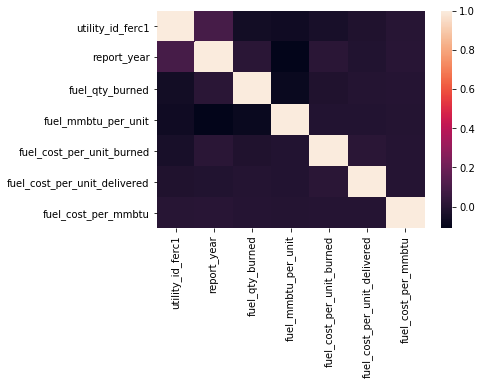

In [79]:
#using heatmap to show correlation
sns.heatmap(fuel_data.corr())

## Question 9

In [84]:
#Average fuel cost per unit burned for fuel type coal in 1998
data = fuel_data[(fuel_data['report_year']==1998) & (fuel_data['fuel_type_code_pudl']=='coal')]
data_1998 = data['fuel_cost_per_unit_burned'].mean()

In [82]:
#Average fuel cost per unit burned for fuel type coal in 1994
data2 = fuel_data[(fuel_data['report_year']==1994) & (fuel_data['fuel_type_code_pudl']=='coal')]
data_1994 = data2['fuel_cost_per_unit_burned'].mean()

In [86]:
#percent change in the averages
diff = ((data_1998 - data_1994)/ data_1998)*100
print(int(diff),'%')

-14 %


## Question 10

In [87]:
#get the average fuel cost per unit delivered per year group
highest_avg = fuel_data.groupby('report_year')['fuel_cost_per_unit_delivered'].mean()

In [88]:
#prints the largest average
highest_avg.nlargest(n=1)

report_year
1997    11140.197239
Name: fuel_cost_per_unit_delivered, dtype: float64